In [1]:
'''
1) Import all necessary libraries
2) Clean the data
3) Perform EDA and Feature Engineering
4) Segment the users and form groups or clusters
5) Apply retention and churn analysis
'''

'\n1) Import all necessary libraries\n2) Clean the data\n3) Perform EDA and Feature Engineering\n4) Segment the users and form groups or clusters\n5) Apply retention and churn analysis\n'

In [2]:
### loading the librarires

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
### load the dataset

In [5]:
df = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Customer Segmentation\notebook\OnlineRetail.csv', encoding='latin')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
### handle null values

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
len(df)

541909

In [10]:
### dropping the description column

In [11]:
df.drop("Description", axis=1, inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df['CustomerID'].nunique()

4372

<Axes: >

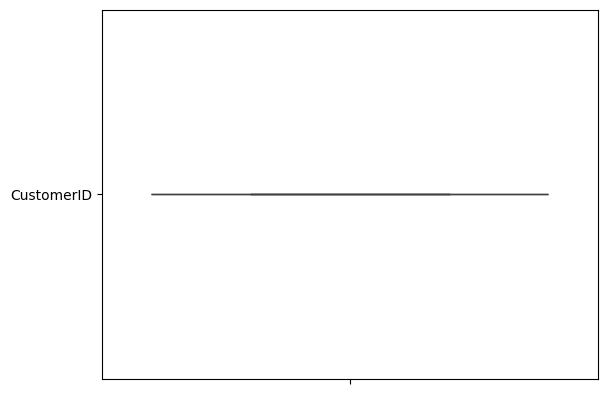

In [14]:
sns.boxplot(data='CustomerID')

In [15]:
df['CustomerID'] = df['CustomerID'].fillna(value=df['CustomerID'].mean())

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(5270)

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
len(df)

536639

In [21]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
df['UnitPrice'][df['UnitPrice'] == 0]

622       0.0
1970      0.0
1971      0.0
1972      0.0
1987      0.0
         ... 
536981    0.0
538504    0.0
538505    0.0
538554    0.0
538919    0.0
Name: UnitPrice, Length: 2510, dtype: float64

<Axes: ylabel='UnitPrice'>

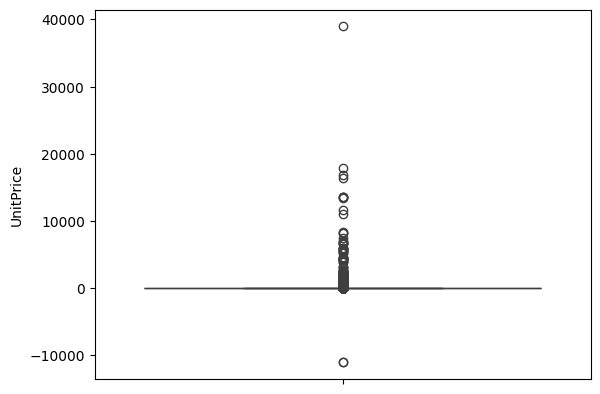

In [24]:
sns.boxplot(df['UnitPrice'])

In [25]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
df = df[df['UnitPrice'] > 0]

<Axes: ylabel='UnitPrice'>

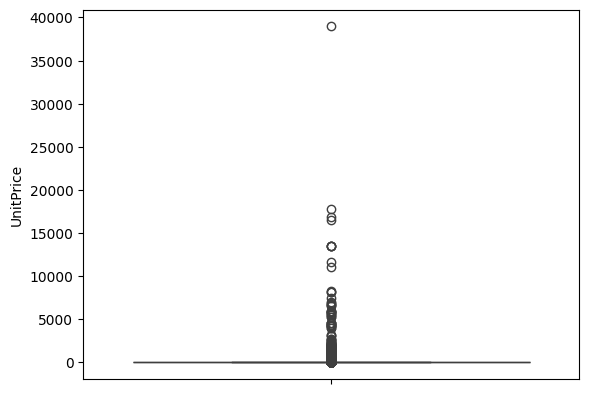

In [27]:
sns.boxplot(df['UnitPrice'])

<Axes: xlabel='UnitPrice', ylabel='Density'>

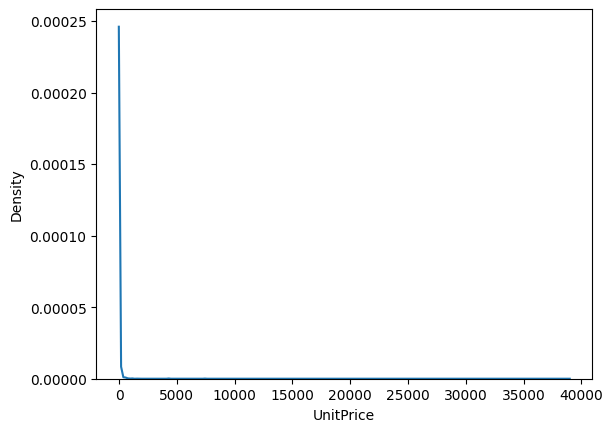

In [28]:
sns.kdeplot(data=df['UnitPrice'])

<Axes: ylabel='UnitPrice'>

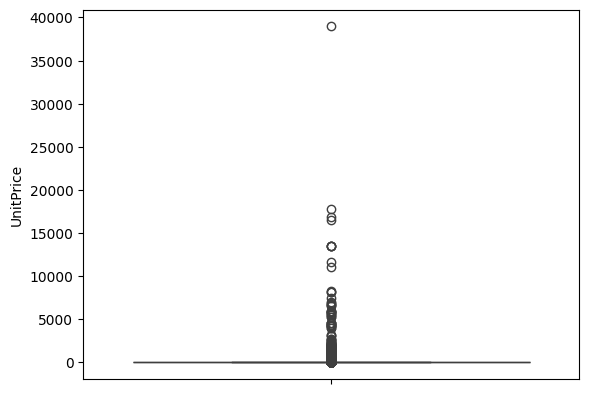

In [29]:
sns.boxplot(df['UnitPrice'])

In [30]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [31]:
df['Quantity'][df['Quantity'] < 0]

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 9251, dtype: int64

In [32]:
df['CustomerID'][df['CustomerID'] < 0]

Series([], Name: CustomerID, dtype: float64)

In [33]:
df['Quantity'].unique().sum()

np.int64(132078)

<Axes: ylabel='Quantity'>

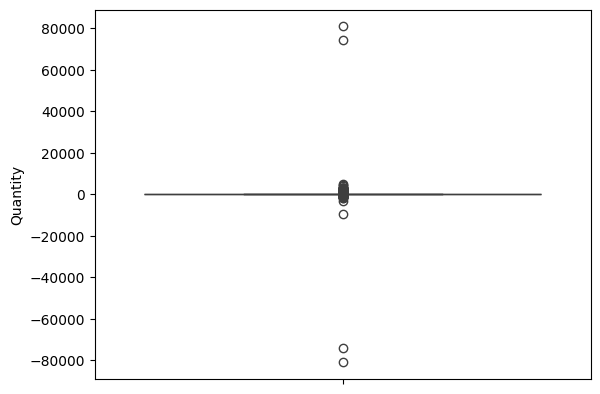

In [34]:
sns.boxplot(df['Quantity'])

In [35]:
df = df[df['Quantity'] > 0]

In [36]:
df['Quantity'][df['Quantity'] < 0]

Series([], Name: Quantity, dtype: int64)

In [37]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
df['StockCode'][df['StockCode'] == '']

Series([], Name: StockCode, dtype: str)

In [39]:
df['InvoiceDate'].shape

(524876,)

In [40]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 524876, dtype: str

In [41]:
invoice = df['InvoiceDate'].str.split(" ").tolist()

In [42]:
invoice

[['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:26'],
 ['12/1/2010', '8:28'],
 ['12/1/2010', '8:28'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:34'],
 ['12/1/2010', '8:35'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '8:45'],
 ['12/1/2010', '

In [43]:
dates = []
months = []
years = []
hours = []

In [44]:
for i in range(0, len(invoice)):
    date = invoice[0][0].split("/")
    time = invoice[0][1].split(":")
    months.append(date[0])
    dates.append(date[1])
    years.append(date[2])
    hours.append(time[0])

In [45]:
dates

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [46]:
months

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',

In [47]:
years

['2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 

In [48]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [49]:
df = pd.DataFrame({
    "InvoiceNo": df["InvoiceNo"],
    "StockCode": df['StockCode'],
    "Quantity": df['Quantity'],
    "InvoiceDate": df['InvoiceDate'],
    "UnitPrice": df['UnitPrice'],
    "CustomerID": df['CustomerID'],
    "Country": df['Country'],
    "Date": dates,
    "Month": months,
    "Year": years,
    "Hour": hours
})

In [50]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8


In [51]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,8


In [52]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [53]:
df.drop("UnitPrice", axis=1, inplace=True)

In [54]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,15.30
1,536365,71053,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
2,536365,84406B,8,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,22.00
3,536365,84029G,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
4,536365,84029E,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34


In [55]:
## Find Total Customers
df['CustomerID'].nunique()

4339

In [56]:
df['TotalPrice'].sum()

np.float64(10641558.954)

In [57]:
## Find min and max dates

In [58]:
print(f"Min date is: {df['Date'].min()} and Max is: {df['Date'].max()}")

Min date is: 1 and Max is: 1


In [59]:
df['Year'].nunique()

1

In [60]:
## find unique months

In [61]:
df['Month'].nunique()

1

In [62]:
df.groupby("Month")['TotalPrice'].sum()

Month
12    1.064156e+07
Name: TotalPrice, dtype: float64

In [63]:
df.groupby("Country")['TotalPrice'].sum().max()

np.float64(9001192.244)

In [64]:
df['Country'].where((df['TotalPrice'] == 8486052.01))

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
541904    NaN
541905    NaN
541906    NaN
541907    NaN
541908    NaN
Name: Country, Length: 524876, dtype: str

In [65]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
Date           0
Month          0
Year           0
Hour           0
TotalPrice     0
dtype: int64

<Axes: ylabel='TotalPrice'>

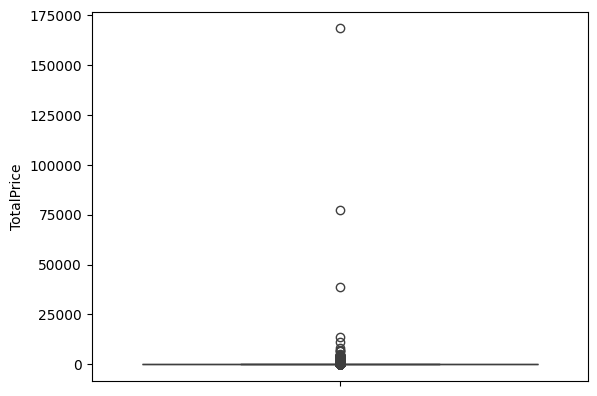

In [66]:
sns.boxplot(df['TotalPrice'])

In [67]:
df['TotalPrice'].fillna(df['TotalPrice'].median(), inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_107952\1872446228.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['TotalPrice'].fillna(df['TotalPrice'].median(), inplace=True)


0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 524876, dtype: float64

In [68]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
Date           0
Month          0
Year           0
Hour           0
TotalPrice     0
dtype: int64

In [69]:
country_revenue = df.groupby("Country")['TotalPrice'].sum()

In [70]:
country_revenue

Country
Australia                138453.810
Austria                   10198.680
Bahrain                     754.140
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20440.540
Cyprus                    13502.850
Czech Republic              826.740
Denmark                   18955.340
EIRE                     283140.520
European Community         1300.250
Finland                   22546.080
France                   209625.370
Germany                  228678.400
Greece                     4760.520
Hong Kong                 15483.000
Iceland                    4310.000
Israel                     8129.410
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal            

In [71]:
countries = country_revenue.index.to_numpy()
revenue = country_revenue.to_numpy()

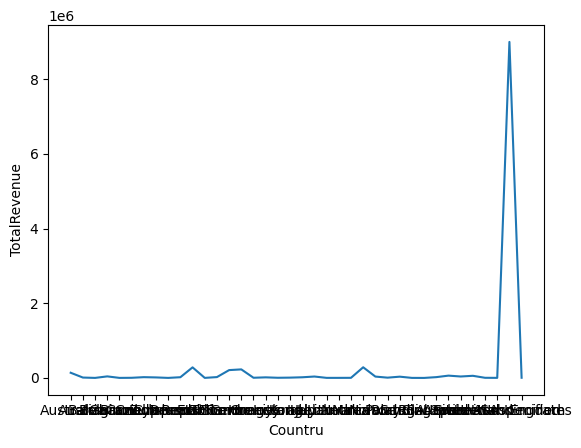

In [72]:
plt.plot(countries, revenue)
plt.xlabel("Countru")
plt.ylabel("TotalRevenue")
plt.show()

In [73]:
df.groupby("Country")['CustomerID'].max()

Country
Australia               16321.00000
Austria                 12865.00000
Bahrain                 15287.69057
Belgium                 12876.00000
Brazil                  12769.00000
Canada                  17844.00000
Channel Islands         14937.00000
Cyprus                  13809.00000
Czech Republic          12781.00000
Denmark                 13919.00000
EIRE                    15287.69057
European Community      15108.00000
Finland                 12704.00000
France                  15287.69057
Germany                 14335.00000
Greece                  17508.00000
Hong Kong               15287.69057
Iceland                 12347.00000
Israel                  15287.69057
Italy                   14912.00000
Japan                   12812.00000
Lebanon                 12764.00000
Lithuania               15332.00000
Malta                   17828.00000
Netherlands             14646.00000
Norway                  12752.00000
Poland                  12816.00000
Portugal            

In [74]:
df.groupby("StockCode")['Quantity'].sum()

StockCode
10002           860
10080           303
10120           192
10123C            5
10124A           16
               ... 
gift_0001_20     10
gift_0001_30      7
gift_0001_40      3
gift_0001_50      4
m                 1
Name: Quantity, Length: 3922, dtype: int64

In [75]:
product_revenue = df.groupby("StockCode")['TotalPrice'].sum()

<Axes: >

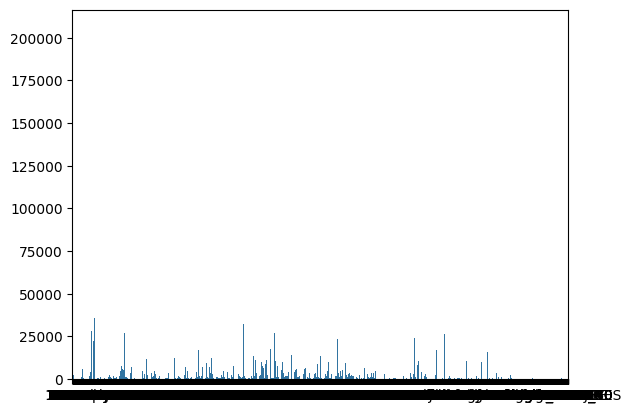

In [76]:
sns.barplot(x=product_revenue.index.to_numpy(), y=product_revenue.to_numpy())

In [77]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,15.30
1,536365,71053,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
2,536365,84406B,8,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,22.00
3,536365,84029G,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
4,536365,84029E,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34


In [78]:
customer = df.groupby("CustomerID")['TotalPrice'].sum().min()

In [79]:
customer

np.float64(3.75)

In [80]:
df.groupby("InvoiceNo")['Month'].size()

InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
581584      2
581585     21
581586      4
581587     15
A563185     1
Name: Month, Length: 19960, dtype: int64

In [81]:
df.groupby("CustomerID").size()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Length: 4339, dtype: int64

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df[df['CustomerID'] == 12348.0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
34083,539318,84992,72,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,39.60
34084,539318,22951,72,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,39.60
34085,539318,84991,24,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,13.20
34086,539318,84991,120,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,50.40
34087,539318,21213,24,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,13.20
34088,539318,21213,120,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,50.40
34089,539318,22616,72,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,20.88
34090,539318,21981,144,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,41.76
34091,539318,21982,144,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,41.76
34092,539318,21725,48,12/16/2010 19:09,12348.0,Finland,1,12,2010,8,40.80


In [84]:
single_order = df.groupby(["CustomerID", "InvoiceNo"]).size().groupby("CustomerID").size()
df[df['CustomerID'].isin(single_order[single_order == 1].index)]

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
155,536384,82484,3,12/1/2010 9:53,18074.0,United Kingdom,1,12,2010,8,19.35
156,536384,84755,48,12/1/2010 9:53,18074.0,United Kingdom,1,12,2010,8,31.20
157,536384,22464,12,12/1/2010 9:53,18074.0,United Kingdom,1,12,2010,8,19.80
158,536384,21324,6,12/1/2010 9:53,18074.0,United Kingdom,1,12,2010,8,17.70
159,536384,22457,12,12/1/2010 9:53,18074.0,United Kingdom,1,12,2010,8,35.40
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,12,12/9/2011 12:16,12713.0,Germany,1,12,2010,8,15.00
541802,581578,22907,12,12/9/2011 12:16,12713.0,Germany,1,12,2010,8,10.20
541803,581578,22908,12,12/9/2011 12:16,12713.0,Germany,1,12,2010,8,10.20
541804,581578,23215,12,12/9/2011 12:16,12713.0,Germany,1,12,2010,8,24.96


In [85]:
df[df['CustomerID'].isin(single_order[single_order > 1].index)]

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,15.30
1,536365,71053,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
2,536365,84406B,8,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,22.00
3,536365,84029G,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
4,536365,84029E,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,12680.0,France,1,12,2010,8,10.20
541905,581587,22899,6,12/9/2011 12:50,12680.0,France,1,12,2010,8,12.60
541906,581587,23254,4,12/9/2011 12:50,12680.0,France,1,12,2010,8,16.60
541907,581587,23255,4,12/9/2011 12:50,12680.0,France,1,12,2010,8,16.60


In [86]:
df[df['CustomerID'].isin(single_order[single_order == 0].index)]

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice


In [87]:
### calculate monetary

In [88]:
monetary = df.groupby("CustomerID")['TotalPrice'].sum()

In [89]:
df.groupby(['CustomerID', 'InvoiceNo']).size().groupby("CustomerID").size()

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Length: 4339, dtype: int64

In [90]:
frequency = df.groupby("CustomerID")['InvoiceNo'].nunique()

In [91]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,15.30
1,536365,71053,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
2,536365,84406B,8,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,22.00
3,536365,84029G,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34
4,536365,84029E,6,12/1/2010 8:26,17850.0,United Kingdom,1,12,2010,8,20.34


In [92]:
df.groupby("CustomerID")['InvoiceNo'].size()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

In [93]:
df.groupby(["CustomerID", "InvoiceDate"]).size()

CustomerID  InvoiceDate     
12346.0     1/18/2011 10:01      1
12347.0     1/26/2011 14:30     29
            10/31/2011 12:25    47
            12/7/2010 14:57     31
            12/7/2011 15:52     11
                                ..
18283.0     7/14/2011 13:20      1
            9/5/2011 12:35      47
18287.0     10/12/2011 10:23    38
            10/28/2011 9:29      3
            5/22/2011 10:39     29
Length: 19766, dtype: int64

In [94]:
customer_last_purchase = df.groupby("CustomerID")['InvoiceDate'].max()

In [95]:
import datetime as dt

In [96]:
dt.datetime.now().day


7

In [97]:
last_purchase = customer_last_purchase.to_numpy()

In [98]:
customer_ids = customer_last_purchase.index.to_numpy()

In [99]:
customer_ids

array([12346., 12347., 12348., ..., 18282., 18283., 18287.], shape=(4339,))

In [100]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [101]:
latest_purchase = df['InvoiceDate'].max()

In [102]:
recency  = (latest_purchase - pd.to_datetime(customer_last_purchase)).dt.days

In [103]:
recency

CustomerID
12346.0    325
12347.0    129
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0    125
18283.0     95
18287.0    201
Name: InvoiceDate, Length: 4339, dtype: int64

In [104]:
rfm = pd.DataFrame({
    "Recency": recency,
    "Frequency": frequency,
    "Monetary": monetary
})

In [105]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,129,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,125,2,178.05


In [106]:
rfm.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [107]:
rfm.duplicated().sum()

np.int64(0)

<Axes: >

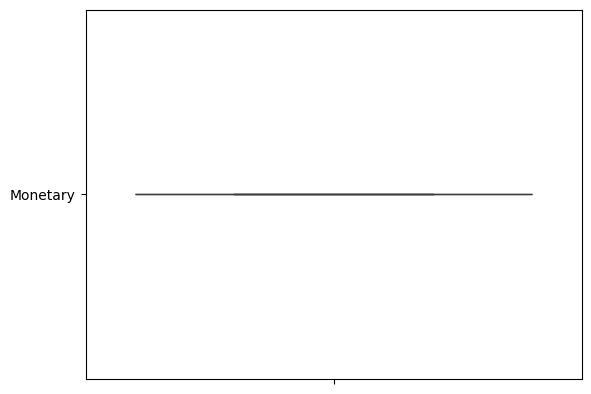

In [108]:
sns.boxplot('Monetary')

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
rfm_scaled = scaler.fit_transform(rfm)

In [112]:
rfm_scaled

array([[ 2.01426236, -0.1569313 ,  2.66111121],
       [-0.09835691,  0.10461082,  0.06614271],
       [-0.69118375, -0.02616024, -0.02333459],
       ...,
       [-0.14147159, -0.11334095, -0.0809926 ],
       [-0.46483169,  0.49692401, -0.01449319],
       [ 0.67770731, -0.06975059, -0.0219088 ]], shape=(4339, 3))

In [113]:
from sklearn.cluster import KMeans

In [114]:
### Find the WCSS for each k value

In [115]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

In [116]:
wcss

[13017.000000000004,
 5271.00900376529,
 2095.499826016441,
 1688.1329540584823,
 1240.2303640538535,
 843.1038845366259,
 682.0078045789154,
 613.4456792236111,
 450.9816846704029,
 387.4390962587243]

In [117]:
len(wcss)

10

Text(0, 0.5, 'WCSS')

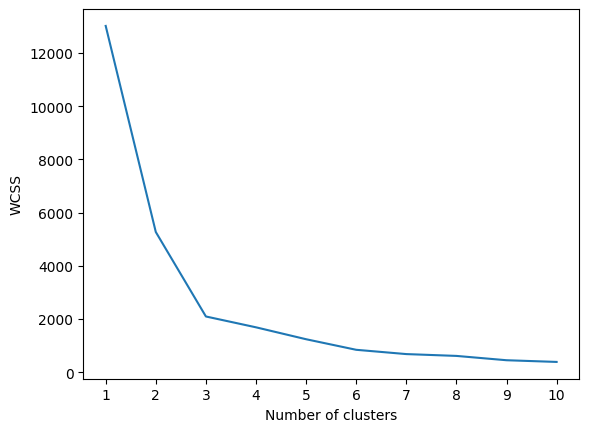

In [118]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm, kmeans.labels_))


In [121]:
silhouette_scores

[0.998055685879893,
 -0.11888370472020673,
 -0.2756132746023823,
 -0.18338773937344374,
 -0.1778928870241569,
 -0.17684404003557502,
 -0.12736606435709968,
 -0.19866576794114948,
 -0.1594495231242714]

Text(0, 0.5, 'Silhouette Score')

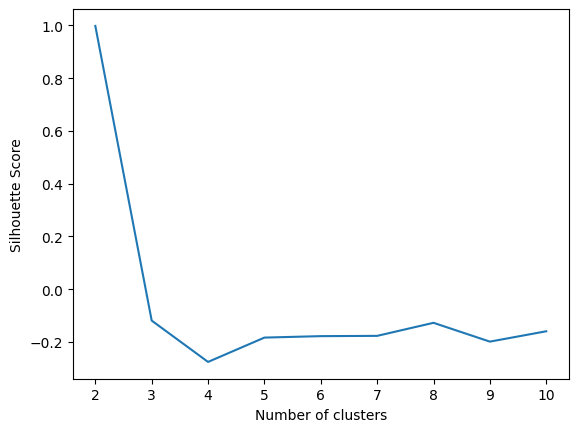

In [122]:
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

In [123]:
### use the clusters found and produce labels

In [124]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [125]:
y_labels = kmeans.fit_predict(rfm)

In [126]:
y_labels

array([0, 0, 0, ..., 0, 0, 0], shape=(4339,), dtype=int32)

In [127]:
rfm['Cluster'] = y_labels

In [128]:
rfm.shape

(4339, 4)

In [129]:
y_labels

array([0, 0, 0, ..., 0, 0, 0], shape=(4339,), dtype=int32)

In [130]:
rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,0
12347.0,129,7,4310.00,0
12348.0,74,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,309,1,334.40,0


In [131]:
rfm[rfm['Cluster'] == 1]

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
15287.69057,90,1428,1754901.91,1


In [132]:
rfm[rfm['Cluster'] == 2]

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12415.0,98,21,124914.53,2
14156.0,92,55,117210.08,2
14646.0,92,73,280206.02,2
14911.0,92,201,143711.17,2
16446.0,205,2,168472.50,2
17450.0,94,46,194390.79,2
17511.0,93,31,91062.38,2
18102.0,71,60,259657.30,2


In [133]:
## find the mean of clusters

In [134]:
rfm.groupby("Cluster").mean()

,Recency,Frequency,Monetary
Cluster,,,
0,138.198152,4.166975,1.733726e+03
1,90.000000,1428.000000,1.754902e+06
2,104.625000,61.125000,1.724531e+05


In [135]:
rfm['ClusterName'] = rfm['Cluster'].map({
    0: "Churn User",
    1: "VIP User",
    2: "Regular User"
})

In [136]:
rfm.head()

,Recency,Frequency,Monetary,Cluster,ClusterName
CustomerID,,,,,
12346.0,325,1,77183.60,0,Churn User
12347.0,129,7,4310.00,0,Churn User
12348.0,74,4,1797.24,0,Churn User
12349.0,18,1,1757.55,0,Churn User
12350.0,309,1,334.40,0,Churn User


In [137]:
rfm[rfm['ClusterName'] == 'VIP User']

,Recency,Frequency,Monetary,Cluster,ClusterName
CustomerID,,,,,
15287.69057,90,1428,1754901.91,1,VIP User


In [138]:
### find repeat and one time customers

In [139]:
total_customers = df.groupby("CustomerID").nunique()

In [140]:
total_customers = total_customers.shape[0]

In [141]:
grouped_customers = df.groupby(["CustomerID", "InvoiceNo"]).size().groupby("CustomerID").size()

In [142]:
grouped_customers

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Length: 4339, dtype: int64

In [143]:
grouped_customers == 1

CustomerID
12346.0     True
12347.0    False
12348.0    False
12349.0     True
12350.0     True
           ...  
18280.0     True
18281.0     True
18282.0    False
18283.0    False
18287.0    False
Length: 4339, dtype: bool

In [144]:
one_time_customers = grouped_customers[grouped_customers == 1]

In [145]:
one_time_customers = one_time_customers.shape[0]

In [146]:
one_time_customers

1493

In [147]:
repeated_customers = grouped_customers[grouped_customers > 1].shape[0]

In [148]:
repeated_customers

2846

In [149]:
### find the retention rate

In [150]:
retention_rate = ((repeated_customers) / (total_customers)) * 100

In [151]:
retention_rate

65.59115003457018

In [152]:
## observation

In [153]:
### About 66 percentage of people have returned and bought the things

In [154]:
### find the churn customers

In [155]:
rfm.head()

,Recency,Frequency,Monetary,Cluster,ClusterName
CustomerID,,,,,
12346.0,325,1,77183.60,0,Churn User
12347.0,129,7,4310.00,0,Churn User
12348.0,74,4,1797.24,0,Churn User
12349.0,18,1,1757.55,0,Churn User
12350.0,309,1,334.40,0,Churn User


In [156]:
churn_customers = rfm[rfm['Recency'] > 90]

In [157]:
churn_customers

,Recency,Frequency,Monetary,Cluster,ClusterName
CustomerID,,,,,
12346.0,325,1,77183.60,0,Churn User
12347.0,129,7,4310.00,0,Churn User
12350.0,309,1,334.40,0,Churn User
12353.0,203,1,89.00,0,Churn User
12354.0,231,1,1079.40,0,Churn User
...,...,...,...,...,...
18280.0,277,1,180.60,0,Churn User
18281.0,180,1,80.82,0,Churn User
18282.0,125,2,178.05,0,Churn User


In [158]:
churn_rate = ((churn_customers.shape[0]) / (total_customers)) * 100

In [159]:
churn_rate

61.35054159944687

In [160]:
## observation

In [161]:
### About 61 percentage lost interest and not coming back to buy the products

In [162]:
rfm.to_csv("customer_segmentation.csv", index=True)

In [163]:
customer_ids

array([12346., 12347., 12348., ..., 18282., 18283., 18287.], shape=(4339,))

In [164]:
orders = df.groupby("CustomerID")['InvoiceNo'].nunique()

In [165]:
orders

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4339, dtype: int64

In [166]:
orders = orders.to_numpy()

In [167]:
orders

array([ 1,  7,  4, ...,  2, 16,  3], shape=(4339,))

In [168]:
import math as m

Text(0, 0.5, 'Orders')

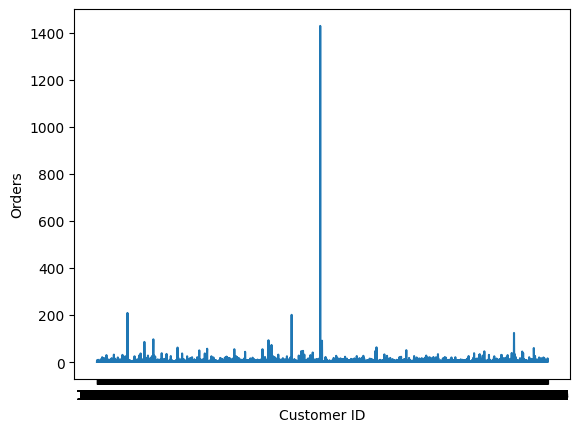

In [169]:
plt.plot(customer_ids, orders)
plt.xticks(customer_ids)
plt.xlabel("Customer ID")
plt.ylabel("Orders")

In [170]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Date,Month,Year,Hour,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,17850.0,United Kingdom,1,12,2010,8,15.30
1,536365,71053,6,2010-12-01 08:26:00,17850.0,United Kingdom,1,12,2010,8,20.34
2,536365,84406B,8,2010-12-01 08:26:00,17850.0,United Kingdom,1,12,2010,8,22.00
3,536365,84029G,6,2010-12-01 08:26:00,17850.0,United Kingdom,1,12,2010,8,20.34
4,536365,84029E,6,2010-12-01 08:26:00,17850.0,United Kingdom,1,12,2010,8,20.34


In [171]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
Date           0
Month          0
Year           0
Hour           0
TotalPrice     0
dtype: int64

In [172]:
df.to_csv("retail_clean.csv", index=True)